In [1]:
using DataFrames, PythonPlot, Distributions,CSV
using SpecialFunctions 
PythonPlot.svg(true)
include("simulations.jl")
include("branching.jl")
include("drawing.jl")
include("single_cell_models.jl")
FIG_PATH= "/Users/elevien/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/pop_growth_size/figures"

"/Users/elevien/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/pop_growth_size/figures"

# Division rate plot

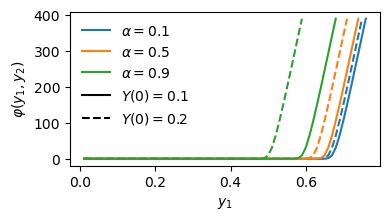

In [2]:
yrang = collect(0.01:0.01:1.)
fig,ax = subplots(figsize=(4,2))

σY = 0.01
α = 0.1
ax.plot(yrang,[φ_gaussian(y,0.1,σY,α) for y in yrang],"C0-",label = L"\alpha=0.1")
ax.plot(yrang,[φ_gaussian(y,0.2,σY,α) for y in yrang],"C0--")

α = 0.3
ax.plot(yrang,[φ_gaussian(y,0.1,σY,α) for y in yrang],"C1-",label = L"\alpha=0.5")
ax.plot(yrang,[φ_gaussian(y,0.2,σY,α) for y in yrang],"C1--")

α = 0.9
ax.plot(yrang,[φ_gaussian(y,0.1,σY,α) for y in yrang],"C2-",label = L"\alpha=0.9")
ax.plot(yrang,[φ_gaussian(y,0.2,σY,α) for y in yrang],"C2--")

ax.plot([0.3],[0.4],"k-",label=L"Y(0)=0.1")
ax.plot([0.3],[0.4],"k--",label=L"Y(0)=0.2")
ax.set_ylabel(L"\varphi(y_1,y_2)")
ax.set_xlabel(L"y_1")
ax.legend(frameon=false)
savefig(FIG_PATH*"/fig2_phi.pdf",bbox_inches="tight")
fig

# Load data from lineage and population simulations over a range of $a$ values

In [40]:
data_l = CSV.read("./data/fig2_data.csv",DataFrame);
data_p = CSV.read("./data/fig2_population_data.csv",DataFrame);


In [41]:
# get lineage cell data frames
data_cells_l = combine(groupby(data_l,[:lineage,:cell]),
    :length => (x -> x[1]) => :M0,
    :length => (x -> x[end]) => :Mf,
    :x => (x -> mean(x)) => :xbar,
    :a => (x -> x[1]) => :a,
    :time => (x -> x[end] - x[1]) => :τ)
data_cells_l[:,:y0] .= log.(data_cells_l[:,:M0])
data_cells_l[:,:ϕ] .= log.(data_cells_l[:,:Mf] ./data_cells_l[:,:M0]);
arange = unique(data_l[:,:a]);

# get population snapshot data frames


data_cells_p = combine(groupby(data_p,[:a,:branch_id]),
    :length => (x -> x[1]) => :M0,
    :length => (x -> x[end]) => :Mf,
    :x => (x -> mean(x)) => :xbar,
    :a => (x -> x[1]) => :a,
    :time => (x -> x[end] - x[1]) => :τ)
data_cells_p[:,:y0] .= log.(data_cells_p[:,:M0])
data_cells_p[:,:ϕ] .= log.(data_cells_p[:,:Mf] ./data_cells_p[:,:M0]);
arange_p = unique(data_p[:,:a]);



In [43]:
# get size length correlations in lineage and populations

cors_l= [cor(d.x,d.length) for d in groupby(data_l,:a)]
cors_p = [cor(d.x,d.length) for d in groupby(data_p[data_p.time_r.== unique(data_p.time_r)[end],:],:a)]

11-element Vector{Float64}:
  0.1658383715235414
  0.09923800348215543
  0.055393658029592445
  0.09289837760049723
 -0.006802591406334741
 -0.011014545966125822
 -0.04124661354035725
 -0.11612286076549933
 -0.08291793580210069
 -0.14384466308684205
 -0.19704154929788067

# Plot lineage statistics as a function of a

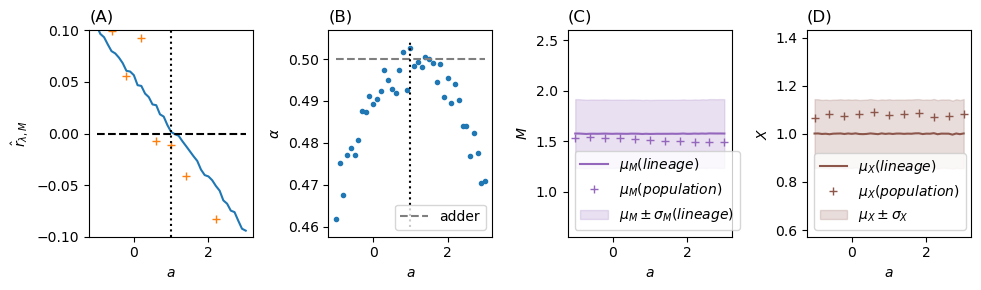

In [44]:


fig,axs = subplots(figsize=(10,3),ncols=4)

ax = axs[0]
ax.plot(arange,cors_l,"-",fillstyle="none",label=L"lineage")
ax.plot(arange_p,cors_p,"+",fillstyle="none",label=L"population")
ax.plot(arange,zeros(length(arange)),"k--")
ax.set_xlabel(L"a")
ax.set_ylabel(L"\hat{r}_{\lambda,M}")
#ax.legend(frameon=true)
ax.set_ylim(-0.1,0.1)
ax.set_title("(A)",loc="left")
ax.vlines(1, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], colors="k", linestyles="dotted")

ax = axs[1]
alphas_l =  [-cov(d.ϕ,d.y0)/var(d.y0) for d in groupby(data_cells_l,:a)]
ax.plot(arange,alphas_l,".")
# ax.plot(arange,ones(length(arange)),"k--",label="sizer")
ax.plot(arange,ones(length(arange))/2,"C7--",label="adder")
ax.legend(frameon=true)
#ax.set_ylim(0.3,0.6)
ax.vlines(1, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], colors="k", linestyles="dotted")
ax.set_xlabel(L"a")
ax.set_ylabel(L"\alpha")


ax.set_title("(B)",loc="left")

ax = axs[2]
mu_l = [mean(d.length) for d in groupby(data_l,:a)]
std_l = [std(d.length) for d in groupby(data_l,:a)]
mu_p= [mean(d.length) for d in groupby(data_p,:a)]
std_p = [std(d.length) for d in groupby(data_p,:a)]
ax.plot(arange,mu_l,"C4-",fillstyle="none",label=L"\mu_M (lineage)")
ax.plot(arange_p,mu_p,"C4+",fillstyle="none",label=L"\mu_M (population)")
ax.fill_between(arange,mu_l .-std_l,mu_l .+std_l,alpha=0.2,color="C4",label=L"\mu_M \pm \sigma_M (lineage)")
ax.set_xlabel(L"a")
ax.set_ylabel(L"M")
ax.legend(frameon=true)
ax.set_ylim(mu_l[1] - 3*std_l[1],mu_l[1] + 3*std_l[1])
ax.set_title("(C)",loc="left")

ax = axs[3]
mu_l = [mean(d.x) for d in groupby(data_l,:a)]
std_l = [std(d.x) for d in groupby(data_l,:a)]
mu_p = [mean(d.x) for d in groupby(data_p,:a)]
std_p = [std(d.x) for d in groupby(data_p,:a)]

ax.plot(arange,mu_l,"C5-",fillstyle="none",label=L"\mu_{X} (lineage)")
ax.plot(arange_p,mu_p,"C5+",fillstyle="none",label=L"\mu_{X} (population)")
ax.fill_between(arange,mu_l .-std_l,mu_l .+ std_l,color="C5",alpha=0.2,label=L"\mu_{X} \pm \sigma_{X}")
ax.set_xlabel(L"a")
ax.set_ylabel(L"X")
ax.set_title("(D)",loc="left")
ax.legend(frameon=true)
ax.set_ylim(mu_l[1] - 3*std_l[1],mu_l[1] + 3*std_l[1])
tight_layout()

savefig(FIG_PATH*"/Fig2.pdf",bbox_inches="tight")
fig